# Technical Write-Up

This project aims to draw conclusions from speed dating data collected at Columbia University and build a model to predict whether two participants will match.

The dataset, sourced from Kaggle, comes as a single table.  I designed and created an SQLite database to segment the data into a more useful and malleable structure.  Using this database I explored the difference in correlatation with participants’ decisions to pursue a second date with or without limitations on 'yes' decisions, how results vary with a participant's self-rated attractiveness and partner rated attractiveness and how 'yes' decisions trend with the sequential order of a date throughout the event. 

## Evaluating a Logistic Regression model against the baseline

After creating the database I implemented a logistic regression model to pedict a participants' decision.  To test my model I first built a baseline model which randomly guessed whether a participant's partner would give a 'yes' decision.  Random guessing produces an accuracy 50%.

In [146]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from random import randint
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib
from IPython.display import display
matplotlib.style.use('ggplot')

speed_data = pd.read_csv('./Speed Dating Data2.csv', encoding = 'iso-8859-1')
features = ['attr_o']
X = speed_data[features]
y = speed_data['dec_o']

random_match_predictions = []
for i in range(len(X)):
    random_match_predictions.append(randint(0,1))
    
print("Random Matches Accuracy: " + str(accuracy_score(y,random_match_predictions)))

Random Matches Accuracy: 0.4971353545


It turns out that the decision made by a participant's partner could be predicted well above teh baseline with just a single feature - how attractive the partner rated the participant.  Adding other features to this model only marginally increased performance, and in some cases detracted from the model's accuracy.  This simple logistic regression gives us roughly 72% accuracy.

This discovery led me to focus on many other aspects of the attractiveness attribute within the dataset which will be discussed later on.

In [147]:
lr_data = speed_data.dropna(axis=0,subset=['attr_o','intel_o','shar_o','int_corr','intel_o',])
#features = ['attr_o','shar_o','int_corr','intel_o']
features = ['attr_o']
model = LogisticRegressionCV(Cs=5)

X_train, X_test, y_train, y_test = train_test_split(lr_data[features], lr_data['dec_o'],test_size = 0.3)

model.fit(X_train,y_train)
model.score(X_test,y_test)


0.7345505617977528

## Does the order of when you meet your partner of a have an impact on their decision?

Before diving into the results found looking into the attributes of the participants, I wanted to establish whether simply the order of a date during the event would influence the participants' decisions.

Related research on sequential decision-making from the University of Negev in Isreal shows that when judges are presiding in court they are far more lenient at the beginning of the day, and likewise after taking a break.

"They found that at the beginning of a court session about 65 per cent of the rulings tended to be in favour of the prisoner, but the chance of a favourable ruling declined to near zero by the end of the session" - theglobeandmail.com

The graph below shows the percentage of 'yes' decisions by date order.  It appears speed dating behavior is consistent the results found in the study of judge leniency.  Participants tend to match more towards the beginning of the event with spikes as the date order is preceeded by a break, signalling a renewed willingness to match.  It's also notable that during the event there is an overall downtrend as the night goes on.

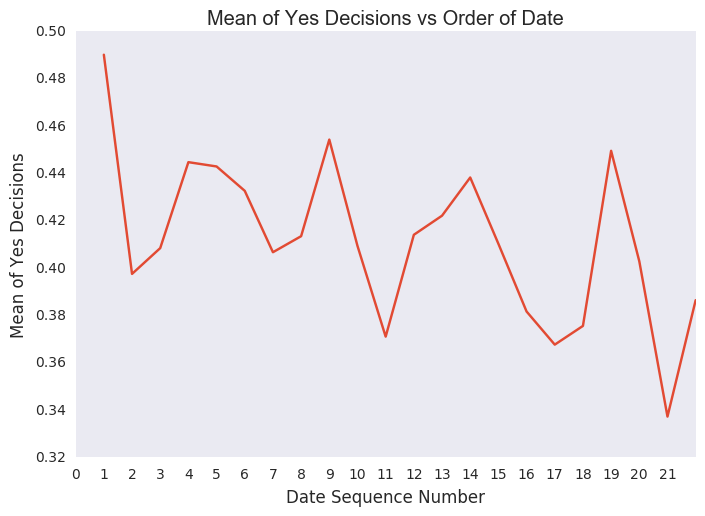

In [148]:
aggregated_order = pd.pivot_table(speed_data,values='dec_o',columns='order',aggfunc='mean')
sns.set_style('dark',{'axes.grid' : False})
aggregated_order.plot()
plt.xticks(range(len(aggregated_order)))
plt.title('Mean of Yes Decisions vs Order of Date')
plt.ylabel('Mean of Yes Decisions')
plt.xlabel('Date Sequence Number')
plt.show()

## Observed differences in attribute importance under limitations
*See Appendix A for dataframe construction and manipulation

During the study there were two scenarios a speed-date event could fall under.  In scenario 1 participants were able to give a 'yes' decision to as many dates as they wanted.  In scenario 2 participants were limited to only giving a 'yes' response to half of their dates.

I wanted to determine how a partner's attribute ratings would influence the decision of a participant differently when there were constraints placed on their 'yes' responses.

I looked at how well the ratings of attractiveness, intelligence and fun correlated with a participant's decision for both scenarios and also segmented the results by gender.  The result was rather striking.  

Female decisions correlated less with each attribute as their responses were limited.  This might suggest that as a woman's options expand they become more selective for these attributes, however, as their options become limited their decisions take greater consideration of other factors.

The unexpected finding here was that men exhibited the exact opposite behavior.  As their options became limited, they were more responsive to partners they percieved to be more attractive, intelligent and fun.  The greatest disparity in attribute correlation between limited and extensive choice is the jump in how men's rating of how fun they perceive their partner affected their 'yes' decisions.

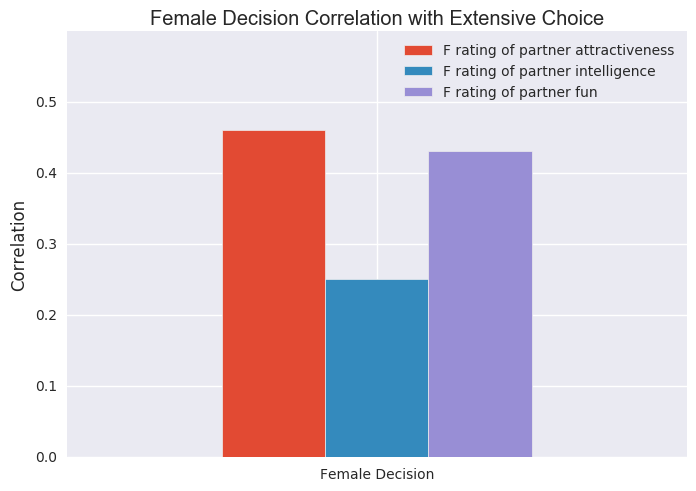

,F rating of partner attractiveness,F rating of partner intelligence,F rating of partner fun
Female Decision,0.461007,0.250342,0.43168


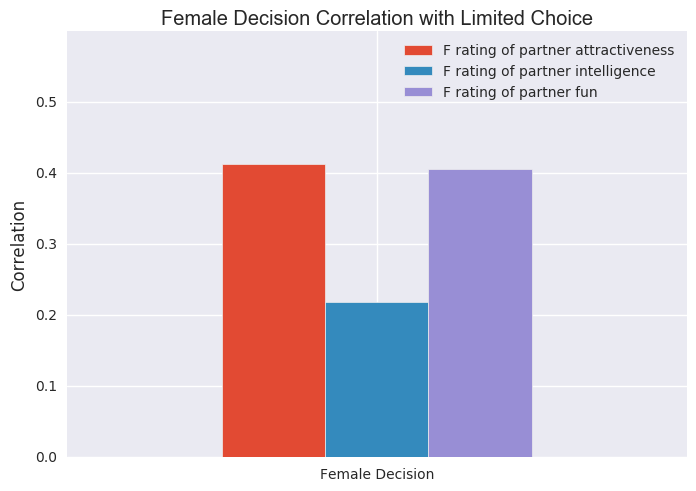

,F rating of partner attractiveness,F rating of partner intelligence,F rating of partner fun
Female Decision,0.412462,0.218562,0.406078


In [149]:
sns.set_style('dark',{'axes.grid' : True})
extensive_female_dec_corrmat.head(1).iloc[:,1:].plot(kind='bar',rot=0)
plt.ylabel('Correlation')
plt.title('Female Decision Correlation with Extensive Choice')
plt.ylim([0,0.6])
plt.show()
display(extensive_female_dec_corrmat.head(1).iloc[:,1:])
limited_female_dec_corrmat.head(1).iloc[:,1:].plot(kind='bar',rot=0)
plt.ylabel('Correlation')
plt.title('Female Decision Correlation with Limited Choice')
plt.ylim([0,0.6])
plt.show()
display(limited_female_dec_corrmat.head(1).iloc[:,1:])

## Men's Inverse Reaction to Limitation

The unexpected finding here was that men exhibited the exact opposite behavior when limiting their number of 'yes' decisions.  As their options became limited, they were more responsive to partners they percieved to be more attractive, intelligent and fun.  The greatest disparity in attribute correlation between limited and extensive choice is the jump in how men's rating of how fun they perceive their partner affected their 'yes' decisions.

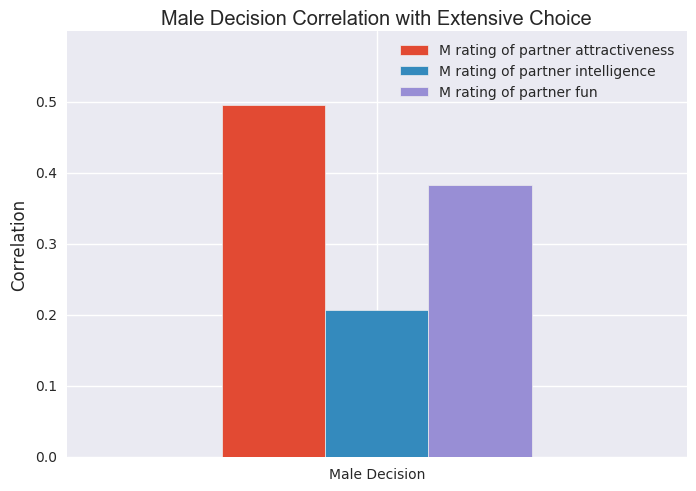

,M rating of partner attractiveness,M rating of partner intelligence,M rating of partner fun
Male Decision,0.49525,0.207197,0.383823


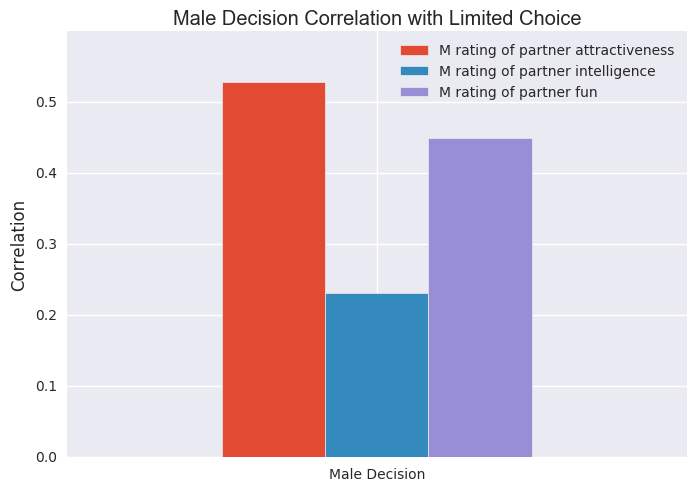

,M rating of partner attractiveness,M rating of partner intelligence,M rating of partner fun
Male Decision,0.528877,0.230865,0.448878


In [150]:
sns.set_style('dark',{'axes.grid' : True})
extensive_male_dec_corrmat.head(1).iloc[:,1:].plot(kind='bar',rot=0)
plt.ylabel('Correlation')
plt.title('Male Decision Correlation with Extensive Choice')
plt.ylim([0,0.6])
plt.show()
display(extensive_male_dec_corrmat.head(1).iloc[:,1:])
limited_male_dec_corrmat.head(1).iloc[:,1:].plot(kind='bar',rot=0)
plt.ylabel('Correlation')
plt.title('Male Decision Correlation with Limited Choice')
plt.ylim([0,0.6])
plt.show()
display(limited_male_dec_corrmat.head(1).iloc[:,1:])

## Observed differences in match results based on self-rated attractiveness
*See Appendix B for dataframe construction and manipulation.

Since attractiveness seemed to be a rather accuate predictor of whether participants give a 'yes' decision, I wanted to explore the relationship between people's rating of their own attractiveness and the matches they receive.

I grouped participants using KMeans clustering based on how highly they rated their own attractiveness the night of the event.  I performed the classification using both 5 and 8 clusters, with similar findings.  

The results for 5 clusters gave three groups who rate their attractiveness between a 5 and 7 with two outlier groups, those who rated themselves extremely high - averaging over 9 - and extremely low - averaging 3.5.

On the aggregate those who rate themselves extremely high do in fact receive more matches than those who rate themselves extremely low in attractiveness, but not by much.  This begged a follow-up question, though. Do results for a high self-rated attractive male differ from that of a female?  This breakdown revealed a dramatic separation.

The results were much different when looking at these groups broekn out by gender.  Men who rated themselves highly attractive did tend to do significantly better than their low self-rating couterparts.  The disparity is nearly 2 matches on average.  Even the next highest group receives almost a full match less.

The same breakdown for females, however, tells a much different story.  The difference in average number of matches between those who rated themselves highest versus those who rated themselves lowest was only 0.2.  Both groups receive roughly the same number of matches.  Even more profound is that the group rating themselves the highest don't even receive the most matches, in fact all the groups rating themselves more conservatively actually received more matches than those who rated themselves the highest!  Very strange.

In [151]:
self_rated_five_class_pivot
#Gender 0 represents females, 1 represents males

gender                                       0                                \
self_rated_class                             0         1         2         3   
number of matches                     2.972117  2.410468  2.501487  2.223684   
self-rated attractiveness at sign-up  5.709759  9.179063  7.000000  3.401316   
avg_attractiveness_rating             6.188312  6.805537  6.517800  5.652548   
self-rated intelligence at sign-up    7.790875  8.834711  8.155600  8.000000   
avg_intelligence_rating               7.284892  7.197458  7.283637  7.349559   
avg_fun_rating                        6.509194  6.679665  6.513414  6.251391   

gender                                                 1                      \
self_rated_class                             4         0         1         2   
number of matches                     2.892996  2.985677  3.803625  2.793905   
self-rated attractiveness at sign-up  8.000000  5.623698  9.413897  7.000000   
avg_attractiveness_rating             6.481016  5.662459  6.793591  5.834683   
self-rated intelligence at sign-up    8.353113  8.227865  9.501511  8.263031   
avg_intelligence_rating               7.289691  7.547812  7.579472  7.273910   
avg_fun_rating                        6.509474  6.205716  6.703393  6.201890   

gender                                                    
self_rated_class                             3         4  
number of matches                     2.018100  2.026582  
self-rated attractiveness at sign-up  3.574661  8.000000  
avg_attractiveness_rating             4.972652  6.028166  
self-rated intelligence at sign-up    7.782805  8.802532  
avg_intelligence_rating               7.358702  7.270740  
avg_fun_rating                        5.814118  6.152609

## Observed differences in match results based on partner-rated attractiveness

The above results were rather striking, so I wanted to see if they would be repeated when grouping participants based on how their partners rated their attractiveness.  This time the clustering was performed based on the average attractiveness rating a participant received from their partners, not themselves.  The outcome supported the results of the earlier logistic regression.

Using the parner's rating as the clustering feature participants, for both genders, who were rated as more attractive literally outmatch their peers, and in order nonetheless.  The disparity between number of matches, however, is far greater between highest vs lowest rated males than it is for the same groups in females

In [152]:
partner_rated_five_class_pivot
#Gender 0 represents females, 1 represents males

gender                                       0                                \
partner_rated_class                          0         1         2         3   
number of matches                     2.304642  1.670017  3.450867  1.365957   
self-rated attractiveness at sign-up  6.983559  6.956449  7.276301  6.200000   
avg_attractiveness_rating             6.176039  5.250109  7.077677  4.140736   
self-rated intelligence at sign-up    8.231141  8.519263  8.016185  8.480851   
avg_intelligence_rating               7.240844  7.082881  7.353587  6.736120   
avg_fun_rating                        6.296614  5.896827  6.967211  5.505711   

gender                                                 1                      \
partner_rated_class                          4         0         1         2   
number of matches                     3.885246  3.126106  2.245708  3.541471   
self-rated attractiveness at sign-up  7.403279  6.879425  6.615880  7.622848   
avg_attractiveness_rating             7.927076  6.213736  5.265679  7.066137   
self-rated intelligence at sign-up    7.970492  8.486726  8.476395  8.485133   
avg_intelligence_rating               7.641359  7.391670  7.299400  7.514844   
avg_fun_rating                        7.250611  6.568728  5.766413  6.982438   

gender                                                    
partner_rated_class                          3         4  
number of matches                     0.915563  4.848921  
self-rated attractiveness at sign-up  6.423841  7.690647  
avg_attractiveness_rating             4.117198  7.941100  
self-rated intelligence at sign-up    8.430464  8.474820  
avg_intelligence_rating               7.051675  7.913459  
avg_fun_rating                        4.924612  7.609285

## Appendix A

In [113]:
conn = sqlite3.connect('SpeedDatingDB.sqlite')

dates = pd.read_sql_query\
("""
SELECT m.date_id
      ,m.iid as 'Male IID'
      ,m.pid as 'Female IID'
      ,m.wave
      ,m.condtn
      ,m.age as 'Male Age'
      ,f.age as 'Female Age'
      
      ,m.dec_o as 'Female Decision'
      ,f.dec_o as 'Male Decision'
      
      ,m.attr_o as 'F rating of partner attractiveness'
      ,f.attr_o as 'M rating of partner attractiveness'
      
      ,m.fun_o as 'F rating of partner fun'
      ,f.fun_o as 'M rating of partner fun'
      
      ,m.intel_o as 'F rating of partner intelligence'
      ,f.intel_o as 'M rating of partner intelligence'
      
      ,m.sinc_o as 'F rating of partner sincerity'
      ,f.sinc_o as 'M rating of partner sincerity'
      
      ,m.shar_o as 'F rating of partner shared interests'
      ,f.shar_o as 'M rating of partner shared interests'
      
      ,m.amb_o as 'F rating of partner ambition'
      ,f.amb_o as 'M rating of partner ambition'
      
      ,m.match
      ,m.[order]
    
      from male_side_of_dates m
      join female_side_of_dates f on f.date_id = m.date_id
      
      
""", conn)

In [114]:
limited_dates = dates[dates['condtn']==1]
extensive_dates = dates[dates['condtn']==2]
limited_female_dec_corrmat = limited_dates[['Female Decision','F rating of partner attractiveness', 'F rating of partner intelligence', 'F rating of partner fun']].corr()
extensive_female_dec_corrmat = extensive_dates[['Female Decision','F rating of partner attractiveness', 'F rating of partner intelligence', 'F rating of partner fun']].corr()
limited_male_dec_corrmat = limited_dates[['Male Decision','M rating of partner attractiveness','M rating of partner intelligence', 'M rating of partner fun']].corr()
extensive_male_dec_corrmat = extensive_dates[['Male Decision','M rating of partner attractiveness','M rating of partner intelligence', 'M rating of partner fun']].corr()

## Appendix B

In [115]:
query = """SELECT p.iid
        , go.go_out_description [goes_out_desc]
        , fd.go_out_description [freq_date_desc]
        , r.avg_attractiveness_rating
        , r.avg_fun_rating
        , r.avg_intelligence_rating
        , r.avg_ambition_rating
        , p.[number of matches]
        , sra.[self-rated attractiveness at sign-up]
        , sra.[self-rated intelligence at sign-up]
        , p.gender
        
    from participants p
    left join ratings r on p.iid = r.iid
    left join Go_Out_and_Frequency_of_Dates_Description go on go.go_out_id = p.go_out
    left join Go_Out_and_Frequency_of_Dates_Description fd on fd.go_out_id = p.frequency_of_dates
    left join self_rated_attributes sra on sra.iid = p.iid
    order by p.iid"""

partic_and_ratings = pd.read_sql_query(query,conn)

In [116]:
features = ['avg_attractiveness_rating']
partner_rated_five_way_classifier = KMeans(5)
partic_and_ratings = partic_and_ratings.dropna()
X = partic_and_ratings[features]
X2 = X # pd.get_dummies(X,columns=['goes_out_desc','freq_date_desc']).dropna()
partic_and_ratings['partner_rated_class'] = partner_rated_five_way_classifier.fit_predict(X)


features = ['self-rated attractiveness at sign-up']
five_way_classifier = KMeans(5)
partic_and_ratings = partic_and_ratings.dropna()
X = partic_and_ratings[features]
partic_and_ratings['self_rated_class'] = five_way_classifier.fit_predict(X)
partic_and_ratings

,iid,goes_out_desc,freq_date_desc,avg_attractiveness_rating,avg_fun_rating,avg_intelligence_rating,avg_ambition_rating,number of matches,self-rated attractiveness at sign-up,self-rated intelligence at sign-up,gender,partner_rated_class,self_rated_class
0,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
1,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
2,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
3,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
4,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
5,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
6,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
7,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
8,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0
9,1,several times a week,almost never,6.700000,7.200000,8.000000,8.000000,4,6.0,8.0,0,2,0


In [117]:
self_rated_five_class_pivot = pd.pivot_table(partic_and_ratings,index='gender',columns=['self_rated_class'],values=['number of matches','self-rated attractiveness at sign-up','avg_attractiveness_rating','self-rated intelligence at sign-up', 'avg_intelligence_rating','avg_fun_rating'],aggfunc='mean')
self_rated_five_class_pivot = self_rated_five_class_pivot.unstack()
self_rated_five_class_pivot = self_rated_five_class_pivot.unstack()
self_rated_five_class_pivot = self_rated_five_class_pivot.unstack()

In [118]:
partner_rated_five_class_pivot = pd.pivot_table(partic_and_ratings,index='gender',columns=['partner_rated_class'],values=['number of matches','self-rated attractiveness at sign-up','avg_attractiveness_rating','self-rated intelligence at sign-up', 'avg_intelligence_rating','avg_fun_rating'],aggfunc='mean')
partner_rated_five_class_pivot = partner_rated_five_class_pivot.unstack()
partner_rated_five_class_pivot = partner_rated_five_class_pivot.unstack()
partner_rated_five_class_pivot = partner_rated_five_class_pivot.unstack()


In [127]:
lr_data.shape

(7118, 195)

In [129]:
speed_data = pd.read_csv('./Speed Dating Data2.csv', encoding = 'iso-8859-1')
speed_data.shape

(8378, 195)